italicized text

In [16]:
#%%
import sys
print(sys.version)

import numpy as np

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


2
Time taken in sec: 0.0397791862487793
2


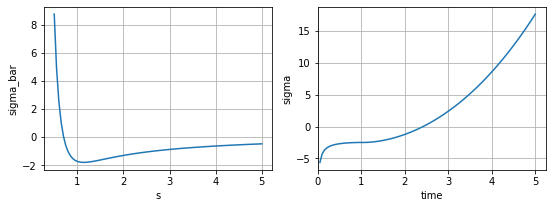

In [21]:
#%%

#%%

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)

from src.euler_inversion import euler_inversion
from src.viscoporoelastic_model import ViscoporoelasticModel
import time as timer
t1=timer.time();

ViscoporoelasticModel.eps0 = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel.strain_rate = 0.1 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel.Vrz = 0.5 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel.Ezz = 10  #@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel()

## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   2#@param {type:"number"} ;
vpe.tau1 = 1 #@param {type:"number"} ;
vpe.tau2 = 1 #@param {type:"number"} ;
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta = 1 #@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err = 1 #@param {type:"number"};

import time as timer
t1=timer.time();
sigma=euler_inversion(vpe.laplace_value, times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
#ss = np.arange(-5, 5.05, 0.05)
ss = np.arange(00.5, 5.05, 0.05)
sigma_bar = vpe.laplace_value(ss)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)

axs[0].plot(ss, sigma_bar)
axs[0].set_xlabel("s")
#axs[0].set_xlim([0, None])
axs[0].set_ylabel("sigma_bar")
axs[0].grid()

axs[1].plot(times, sigma)
axs[1].set_xlabel("time")
axs[1].set_xlim([0, None])
axs[1].set_ylabel("sigma")
axs[1].grid()

#axs[0].show()

